In [1]:
from analysis import smooth_outliers

import pickle
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
with open("rocket_data.pickle", "rb") as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df["time"] = pd.to_timedelta(df["time"])

# Analysis of Rocket Flight Data
## Stage 1 Altitude and Velocity

In [3]:
filtered_stage1_alts = smooth_outliers(df, "stage1_alt")
filtered_stage1_vels = smooth_outliers(df, "stage1_vel")

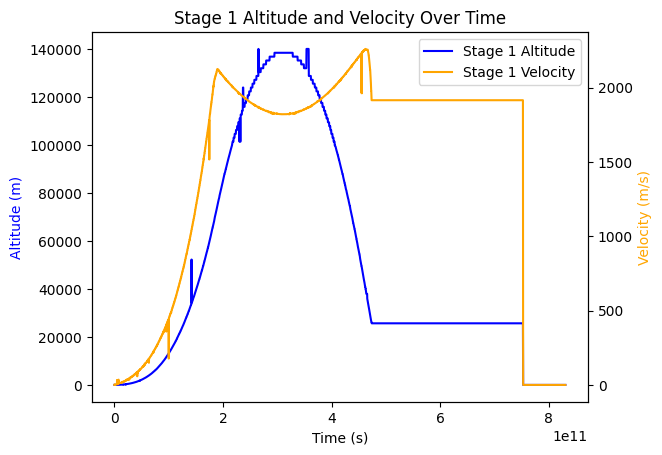

In [4]:
fig, ax = plt.subplots()
ax.plot(filtered_stage1_alts["time"], filtered_stage1_alts["stage1_alt"], label="Stage 1 Altitude", color="blue")

ax2 = ax.twinx()
ax2.plot(filtered_stage1_vels["time"], filtered_stage1_vels["stage1_vel"], color="orange", label="Stage 1 Velocity")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Altitude (m)", color="blue")
ax2.set_ylabel("Velocity (m/s)", color="orange")
ax.set_title("Stage 1 Altitude and Velocity Over Time")

# Combine handles and labels from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)

plt.show()

## Stage 2 Altitude and Velocity

In [5]:
filtered_stage2_alts = smooth_outliers(df, "stage2_alt")
filtered_stage2_vels = smooth_outliers(df, "stage2_vel")

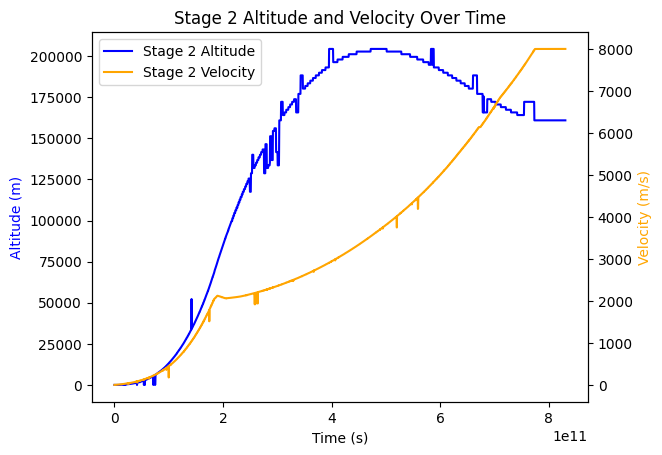

In [6]:
fig, ax = plt.subplots()
ax.plot(filtered_stage2_alts["time"], filtered_stage2_alts["stage2_alt"], label="Stage 2 Altitude", color="blue")

ax2 = ax.twinx()
ax2.plot(filtered_stage2_vels["time"], filtered_stage2_vels["stage2_vel"], color="orange", label="Stage 2 Velocity")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Altitude (m)", color="blue")
ax2.set_ylabel("Velocity (m/s)", color="orange")
ax.set_title("Stage 2 Altitude and Velocity Over Time")

# Combine handles and labels from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)

plt.show()

## Stage 2 Vertical Velocity

In [9]:
stage_2_vertical_vel = ((df["stage2_alt"].diff()) / df["time"].diff().dt.total_seconds())[1:]
stage_2_vertical_vel_times = df["time"][1:]

# Remove points that are noise etc
stage_2_vertical_vel_df = smooth_outliers(pd.DataFrame({"time": stage_2_vertical_vel_times, "vertical_vel": stage_2_vertical_vel}), "vertical_vel", threshold_multiplier=10000000, derivative_smoothing=False)
mask = (stage_2_vertical_vel_df["vertical_vel"].abs() > 0) & (stage_2_vertical_vel_df["vertical_vel"].abs() < 100)
stage_2_vertical_vel_df = stage_2_vertical_vel_df[mask]

# Apply rolling median smoothing
stage_2_vertical_vel_df["vertical_vel"] = stage_2_vertical_vel_df["vertical_vel"].rolling(window=15, center=True).mean()

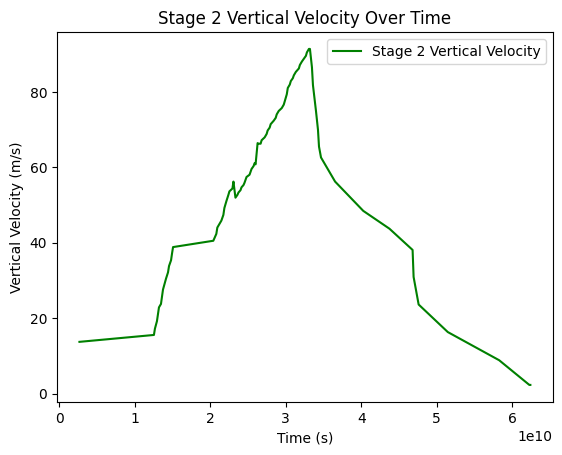

In [10]:
plt.plot(stage_2_vertical_vel_df["time"], stage_2_vertical_vel_df["vertical_vel"], label="Stage 2 Vertical Velocity", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Vertical Velocity (m/s)")
plt.title("Stage 2 Vertical Velocity Over Time")
plt.legend()
plt.show()